# Код проекта по вычислительной линейной алгебры
### Шейнов Артём, Смирнов Максим, Миргалеев Марк

### Тема: Устойчивое вычисление Матрицы Вандермонда в методе Арнольди  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from tqdm import tqdm

#### Методы вычисления обратной матрицы Вандермонда


In [2]:
# Numpy метод Гаусса c точностью np.float64
def numpy_gaus(x : np.ndarray, vander : np.ndarray):
    return np.linalg.inv(vander)

In [3]:
# Метод Гаусса с точностью np.float128

def gaus_ext(x : np.ndarray, vander : np.ndarray):
    N = vander.shape[0]
    sig = np.zeros((N+1,N+1),dtype = np.float128)#[[0]*(N+1)]*(N+1)
    fi = np.zeros(N+1,dtype = np.float128)#[0]*(N+1)
    ksi = np.zeros((N+1,N+1),dtype = np.float128)
    if(vander.shape[1] > 1):
        Van = vander[:,1].astype(np.float128)
    else:
        return np.array([1/vander[0,0]])
    Van = np.insert(Van,0,0)
    for m in range(len(Van)):
        for s in range(len(Van)):
            if(s == 0):
                sig[m,s] = 1
            elif(s > m):
                sig[m,s] = 0
            else:
                sig[m,s] = sig[m-1,s] + Van[m]*sig[m-1,s-1]
    for m in range(1,len(Van)):
        fi[m] = 1
        for s in range(1,len(Van)):
            if(s < m):
                fi[m] /= Van[m] - Van[s]
            elif(s > m):
                fi[m] /= Van[s] - Van[m]
            
    n = len(Van)-1
    for i in range(len(Van)-1,0,-1):
        for j in range(1,len(Van)):
            if(i == n ):
                ksi[n,j] = (-1)**(n+j)
            else:
                ksi[i,j] = Van[j]*ksi[i+1,j] - (-1)**(i+j+1)*sig[n,n-i]
    fi = np.array(fi[1:],dtype = np.float128)
    ksi = np.array(ksi, dtype = np.float128)
    A = (ksi[1:,1:]*fi).astype(np.float128)
    return A.astype(np.float128)

# def numpy_gaus(x : np.ndarray, vander : np.ndarray):
#     """
#     Функция получает на вход матрицу, затем добавляет к ней единичную матрицу, 
#     проводит элементарные преобразования по строкам с первоначальной, добиваясь получения слева единичной матрицы.
#     В этом случае справа окажется матрица, которая является обратной к заданнй первоначально 
#     """
#     # Склеиваем 2 матрицы: слева - первоначальная, справа - единичная
#     n = vander.shape[0]
#     m = np.hstack((vander, np.eye(n)))
    
#     for nrow, row in enumerate(m):
#         # nrow равен номеру строки
#         # row содержит саму строку матрицы
#         divider = row[nrow] # диагональный элемент
#         # делим на диагональный элемент:
#         row /= divider
#         # теперь вычитаем приведённую строку из всех нижележащих строк:
#         for lower_row in m[nrow+1:]:
#             factor = lower_row[nrow] # элемент строки в колонке nrow
#             lower_row -= factor*row # вычитаем, чтобы получить ноль в колонке nrow
#     # обратный ход:
#     for k in range(n - 1, 0, -1):
#         for row_ in range(k - 1, -1, -1):
#             if m[row_, k]:
#                 # 1) Все элементы выше главной диагонали делаем равными нулю
#                 m[row_, :] -= m[k, :] * m[row_, k]
#     return m[:,n:].copy()

In [4]:
# Метод, который вычисляет элементы матрицы по формуле
def math_inv(x : np.ndarray, vander : np.ndarray):
    """
    Returns inverse of vandermond matrix of given array of x-es

    Parameters:
        x (1d or 2d np.ndarray):
            If shape of given x.ndim != 1 takes second row of given matrix as x

    Returns:
        np.ndarray: Inverse matrix of V(x_1, ..., x_n) matrix   
    """
    assert x.ndim == 1

    def get_indeces(j, k, n):
        raw = list(itertools.combinations(range(n), n - k - 1))
        out = []
        for indx in raw:
            if j not in indx:
                out.append(list(indx))
            
        return out

    prec = np.float64

    x = x.astype(prec)
    n = x.shape[0]

    inv = np.zeros((n,n), dtype=prec)

    for j in range(n):
        proj = x[j] - x 
        proj[j] = 1
        frac = 1 / (np.prod(proj))
        
        for k in range(n - 1):
            indeces = np.array(get_indeces(j, k, n))
            s = 0
            for z in indeces:
                s += np.prod(x[z])
            inv[k][j] = (-1)**(n-k+1) * s * frac


        inv[n-1][j] = frac

    return inv

In [5]:
# Алгоритм PEF

def pef_inverse(x : np.ndarray, vander : np.ndarray):
    N = vander.shape[0]
    sig = np.zeros((N+1,N+1),dtype = np.float64)#[[0]*(N+1)]*(N+1)
    fi = np.zeros(N+1,dtype = np.float64)#[0]*(N+1)
    ksi = np.zeros((N+1,N+1),dtype = np.float64)
    if(vander.shape[1] > 1):
        Van = vander[:,1].astype(np.float64)
    else:
        return np.array([1/vander[0,0]])
    Van = np.insert(Van,0,0)
    for m in range(len(Van)):
        for s in range(len(Van)):
            if(s == 0):
                sig[m,s] = 1
            elif(s > m):
                sig[m,s] = 0
            else:
                sig[m,s] = sig[m-1,s] + Van[m]*sig[m-1,s-1]
    for m in range(1,len(Van)):
        fi[m] = 1
        for s in range(1,len(Van)):
            if(s < m):
                fi[m] /= Van[m] - Van[s]
            elif(s > m):
                fi[m] /= Van[s] - Van[m]
            
    n = len(Van)-1
    for i in range(len(Van)-1,0,-1):
        for j in range(1,len(Van)):
            if(i == n ):
                ksi[n,j] = (-1)**(n+j)
            else:
                ksi[i,j] = Van[j]*ksi[i+1,j] - (-1)**(i+j+1)*sig[n,n-i]
    fi = np.array(fi[1:],dtype = np.float64)
    ksi = np.array(ksi, dtype = np.float64)
    A = (ksi[1:,1:]*fi).astype(np.float64)
    return A.astype(np.float64)

In [6]:
# Алгоритм EF

def phi(m, s, x):
    if (m, s) == (2, 1) or (m, s) == (2, 2):
        return 1 / (x[1] - x[0])
    if m == s:
        return 1 / np.prod(x[m - 1] - x[:(m - 1)])
    return phi(m - 1, s, x) / (x[m - 1] - x[s - 1])

def findsubsets(s, n):
    return list(itertools.combinations(s, n))
    
def psi(n, i, j, x, mode='v1'):
    # mode = {v1, v2, v3, v4}
    def subsets(numbers):
        if numbers == []:
            return [[]]
        x = subsets(numbers[1:])
        return x + [[numbers[0]] + y for y in x]

    def subsets_of_given_size(numbers, n):
        return [x for x in subsets(numbers) if len(x)==n]
    
    def sigma(m, s, x):
        if s < 0 or m < 0 or s > m:
            return 0
        if  s == 0 and m >= 0:
            return 1
        return sigma(m - 1, s, x) + x[m - 1] * sigma(m - 1, s - 1, x)
    
    if mode == 'v1':
        V = 0
        SETS = subsets_of_given_size(list(np.delete(x, j - 1)), n - i)
        for el in SETS:
            V += np.prod(list(el))
    elif mode == 'v2':
        V = 0
        SETS = findsubsets(set(np.delete(x, j - 1)), n - i)
        for el in SETS:
            V += np.prod(list(el))
    elif mode == 'v3':
        V = sum([(-1) ** r * x[j - 1] ** r * sigma(n, n - i - r, x) for r in range(0, n - i + 1)])
    elif mode == 'v4':
        V = sigma(len(x) - 1, n - i, np.delete(x, j - 1))
    
    return (-1) ** (i + j) * V

def ef_inverse(x, v, mode_psi='v1'):
    
    phis = np.array([phi(len(x), j, x) for j in range(1, len(x) + 1)])
    
    psis = np.zeros((len(x), len(x)))
    for i in range(1, len(x) + 1):
        for j in range(1, len(x) + 1):
            psis[i - 1, j - 1] = psi(len(x), i, j, x, mode=mode_psi)
            
    return psis * phis

## Построение графиков

In [7]:
def make_van(x : np.ndarray, precission=np.float64):
    vand = np.zeros((len(x), len(x)))
    for i in range(len(x)):
        for j in range(len(x)):
            vand[i,j] = np.power((x[i]), j, dtype = precission)

In [8]:
def make_x(n : int, rng : tuple = (0, 1), dist='norm'):    
    assert rng[0] < rng[1] 
    
    if dist == 'norm':
        x = np.random.randn(n)    
        x = x * (rng[1] - rng[0]) + rng[0]
    elif dist == 'uni':
        x = np.random.uniform(0, 1, size=n)    
        x = x * (rng[1] - rng[0]) + rng[0]
    elif dist == 'equidistant 1_n':
        x = [k for k in range(1, n + 1)]    
    elif dist == 'equidistant 0_1':
        x = [(k - 1) / (n - 1) for k in range(1, n + 1)]   
    elif dist == 'equidistant neg1_1':
        assert n > 1, "n must be greater than 1"       
        x = [(2 * k - n - 1) / (n - 1) for k in range(1, n + 1)]
    elif dist == 'chebyshev':
        x = [np.cos((2 * k - 1) * np.pi / (2 * n)) for k in range(1, n + 1)]
    elif dist == 'chebyshev extended':        
        x = [- np.cos((2 * k - 1) * np.pi / (2 * n)) / np.cos(np.pi / (2 * n)) for k in range(1, n + 1)]   
    elif dist == 'gauss-lobatto chebyshev':
        assert n > 1, "n must be greater than 1"        
        x = [- np.cos((k - 1) * np.pi / (n - 1)) for k in range(1, n + 1)]    
        
    x = np.array(x)
    
    return x

In [9]:
def get_xes(indeces : int, rng : tuple = (0, 1), dist='norm'):
    x = []
    for indx in indeces:
        x.append(make_x(indx, rng, dist))
    
    return x

In [10]:
def get_matrixes(x : np.ndarray):    
    v = np.vander(x, increasing=True)
    # v = make_van(x)
    
    naive_inv = math_inv(x, v)
    np_inv64 = numpy_gaus(x, v)
    np_inv128 = gaus_ext(x, v)
    pef_mat = pef_inverse(x, v)
    ef_mat = ef_inverse(x, v, 'v1')

    return {
        'v' : v,
        'math' : naive_inv,
        'inv64' : np_inv64,
        'inv128' : np_inv128,
        'pef' : pef_mat,
        'ef' : ef_mat
    }

In [11]:
def get_norms(matrixes : dict, mode='r'):
    v, math, inv64, inv128, pef, ef = matrixes['v'], matrixes['math'], matrixes['inv64'], matrixes['inv128'], matrixes['pef'], matrixes['ef']
    
    i = np.eye(v.shape[0])

    # Right
    if mode == 'r':
        t = v @ math
        e_math = np.linalg.norm(t - i) / np.linalg.norm(t)
        t = v @ inv64
        e_inv64 = np.linalg.norm(t - i) / np.linalg.norm(t)
        t = v @ pef
        e_pef = np.linalg.norm(t - i) / np.linalg.norm(t)
        t = v @ ef
        e_ef = np.linalg.norm(t - i) / np.linalg.norm(t)

    # Left
    elif mode == 'l':
        t = math @ v
        e_math = np.linalg.norm(t - i) / np.linalg.norm(t)
        t = inv64 @ v
        e_inv64 = np.linalg.norm(t - i) / np.linalg.norm(t)
        t = pef @ v
        e_pef = np.linalg.norm(t - i) / np.linalg.norm(t)
        t = ef @ v
        e_ef = np.linalg.norm(t - i) / np.linalg.norm(t)

    # Right true
    elif mode == 't':
        t = math
        e_math = np.linalg.norm(t - inv128) / np.linalg.norm(t)
        t = inv64
        e_inv64 = np.linalg.norm(t - inv128) / np.linalg.norm(t)
        t = pef
        e_pef = np.linalg.norm(t - inv128) / np.linalg.norm(t)
        t = ef
        e_ef = np.linalg.norm(t - inv128) / np.linalg.norm(t)

    return e_math, e_inv64, e_pef, e_ef

In [12]:
def get_info(xes, matrixes, mode='r'):
    e1, e2, e3, e4 = [], [], [], []
    xsz = []
    for i, x in enumerate(xes):
        t1, t2, t3, t4 = get_norms(matrixes[i], mode)
        e1.append(t1)
        e2.append(t2)
        e3.append(t3)
        e4.append(t4)
        xsz.append(x.shape[0])
    
    return {
        'e1' : e1, 
        'e2' : e2, 
        'e3' : e3, 
        'e4' : e4, 
        'xsz' : xsz
    }

In [13]:
def plot_sizes(info, rng : tuple, mode='r', init_mode='uni', log=False):
    
    # math, inv64, pef, ef, n
    e1, e2, e3, e4, xsz = info['e1'], info['e2'], info['e3'], info['e4'], info['xsz']

    plt.figure(figsize=(10, 6))
    
    plt.title(f"{mode} with init {init_mode} in range=[{rng[0]},{rng[1]}]", fontsize=15)
    plt.plot(xsz, e1, linewidth=2, label="math")
    plt.plot(xsz, e2, linewidth=2, label="inv64")
    plt.plot(xsz, e3, linewidth=2, label="pef")
    plt.plot(xsz, e4, linewidth=2, label="ef")

    plt.legend()
    if log:
        plt.yscale("log")
        plt.ylabel("Log difference of inversion")
    else:
        plt.ylabel("Absolute difference of inversion")

    plt.xlabel("Size of random matrix")
    plt.grid(True)

    plt.show()

In [14]:
def plot_sizes_triplet(info0, info1, info2, rng : tuple, init_mode='uni', log=False):
    
    # math, inv64, pef, ef, n
    e01, e02, e03, e04, xsz0 = info0['e1'], info0['e2'], info0['e3'], info0['e4'], info0['xsz']
    e11, e12, e13, e14, xsz1 = info1['e1'], info1['e2'], info1['e3'], info1['e4'], info1['xsz']
    e21, e22, e23, e24, xsz2 = info2['e1'], info2['e2'], info2['e3'], info2['e4'], info2['xsz']

    plt.figure(figsize=(20, 5))
    
    plt.ylabel("Log difference of inversion")
    if log:
        plt.yscale("log")
    else:
        plt.ylabel("Absolute difference of inversion")


    plt.subplot(1, 3, 1)
    plt.title(f"<R> with init {init_mode.upper()} in range=[{rng[0]},{rng[1]}]", fontsize=11)
    plt.plot(xsz0, e01, linewidth=2, label="math")
    plt.plot(xsz0, e02, linewidth=2, label="inv64")
    plt.plot(xsz0, e03, linewidth=2, label="pef")
    plt.plot(xsz0, e04, linewidth=2, label="ef")
    plt.legend()
    plt.grid(True)
    if log:
        plt.yscale("log")

    plt.subplot(1, 3, 2)
    plt.title(f"<L> with init {init_mode.upper()} in range=[{rng[0]},{rng[1]}]", fontsize=11)
    plt.plot(xsz1, e11, linewidth=2, label="math")
    plt.plot(xsz1, e12, linewidth=2, label="inv64")
    plt.plot(xsz1, e13, linewidth=2, label="pef")
    plt.plot(xsz1, e14, linewidth=2, label="ef")
    plt.legend()
    plt.grid(True)
    plt.xlabel("Size of random matrix")
    if log:
        plt.yscale("log")


    plt.subplot(1, 3, 3)
    plt.title(f"<T> with init {init_mode.upper()} in range=[{rng[0]},{rng[1]}]", fontsize=11)
    plt.plot(xsz2, e21, linewidth=2, label="math")
    plt.plot(xsz2, e22, linewidth=2, label="inv64")
    plt.plot(xsz2, e23, linewidth=2, label="pef")
    plt.plot(xsz2, e24, linewidth=2, label="ef")
    plt.legend()
    plt.grid(True)
    if log:
        plt.yscale("log")
    

    plt.show()

### Настраиваем параметры

#### Сравение на различных методах инициализации

100%|██████████| 19/19 [13:33<00:00, 42.81s/it] 


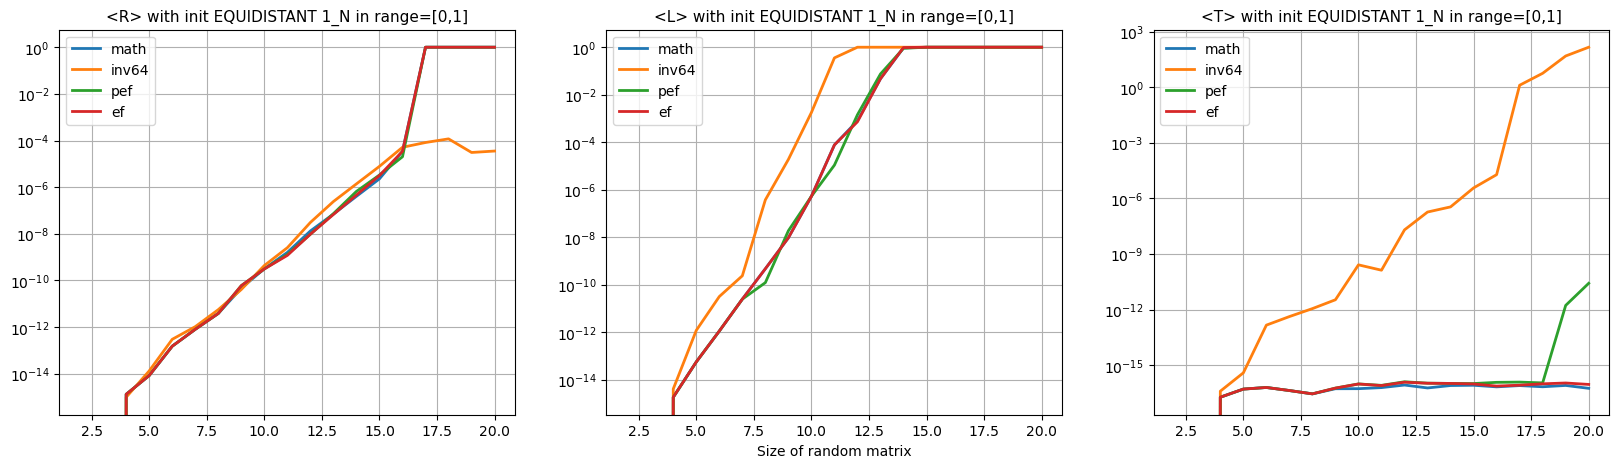

1it [13:34, 814.40s/it]


In [34]:
n = 20
sizes = np.arange(2, n + 1)

inits = [
        # ('norm', (-1, 1)), 
        # ('uni', (-1, 1)),
        ('equidistant 1_n', (0, 1))
        # ('equidistant neg1_1', (0, 1)), 
        # ('chebyshev', (0, 1)), 
        # ('chebyshev extended', (0, 1)), 
        # ('gauss-lobatto chebyshev', (0, 1))
]

for i, (dist, rng) in tqdm(enumerate(inits)):
    xes = get_xes(sizes, rng, dist)
    matrixes = []
    for x in tqdm(xes): 
        matrixes.append(get_matrixes(x))    
    infr = get_info(xes, matrixes, mode='r')
    infl = get_info(xes, matrixes, mode='l')
    inft = get_info(xes, matrixes, mode='t')

    plot_sizes_triplet(infr, infl, inft, rng, dist, True)

    # plot_sizes(infr, rng, mode='r', init_mode=dist, log=True)
    # plot_sizes(infl, rng, mode='l', init_mode=dist, log=True)
    # plot_sizes(inft, rng, mode='t', init_mode=dist, log=True)

#### Различные масштабы

100%|██████████| 1/1 [00:37<00:00, 37.03s/it]
11it [06:58, 38.08s/it]


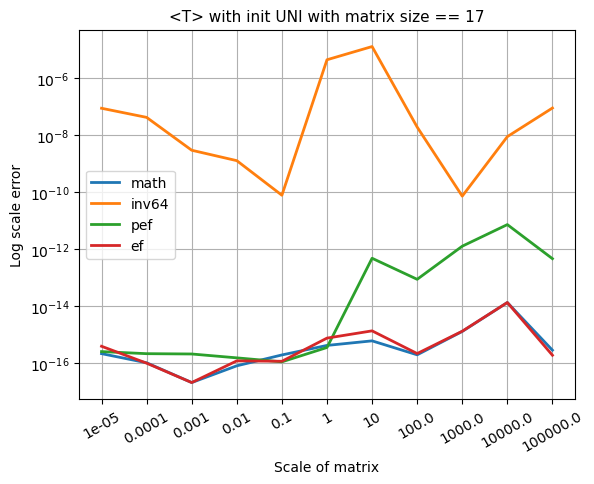

In [27]:
n = 17
sizes = np.arange(n, n + 1)

inits = [
        ('uni', (-1e-5, 1e-5)),
        ('uni', (-1e-4, 1e-4)),
        ('uni', (-1e-3, 1e-3)),
        ('uni', (-1e-2, 1e-2)),
        ('uni', (-0.1, 0.1)),
        ('uni', (-1, 1)),
        ('uni', (-10, 10)),
        ('uni', (-1e2, 1e2)),
        ('uni', (-1e3, 1e3)),
        ('uni', (-1e4, 1e4)),
        ('uni', (-1e5, 1e5))
]

e1, e2, e3, e4, sc = [], [], [], [], []

for i, (dist, rng) in tqdm(enumerate(inits)):
    xes = get_xes(sizes, rng, dist)
    matrixes = []
    for x in tqdm(xes): 
        matrixes.append(get_matrixes(x))    

    inft = get_info(xes, matrixes, mode='t')
    
    sc.append(str(rng[1]))
    e1.append(inft['e1'][0])
    e2.append(inft['e2'][0])
    e3.append(inft['e3'][0])
    e4.append(inft['e4'][0])

plt.title(f"<T> with init UNI with matrix size == {n}", fontsize=11)
plt.plot(sc, e1, linewidth=2, label="math")
plt.plot(sc, e2, linewidth=2, label="inv64")
plt.plot(sc, e3, linewidth=2, label="pef")
plt.plot(sc, e4, linewidth=2, label="ef")
plt.legend()
plt.grid(True)
plt.xlabel("Scale of matrix")
plt.yscale("log")
plt.ylabel('Log scale error')
plt.xticks(rotation=30)
plt.show()

100%|██████████| 1/1 [00:38<00:00, 38.23s/it]
11it [06:57, 37.92s/it]


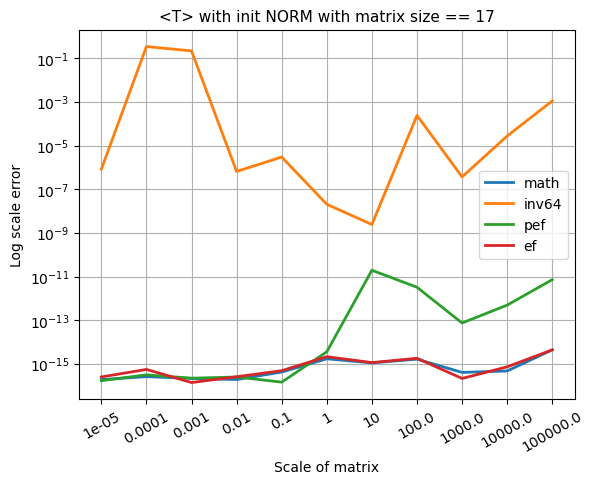

In [26]:
n = 17
sizes = np.arange(n, n + 1)

inits = [
        ('norm', (-1e-5, 1e-5)),
        ('norm', (-1e-4, 1e-4)),
        ('norm', (-1e-3, 1e-3)),
        ('norm', (-1e-2, 1e-2)),
        ('norm', (-0.1, 0.1)),
        ('norm', (-1, 1)),
        ('norm', (-10, 10)),
        ('norm', (-1e2, 1e2)),
        ('norm', (-1e3, 1e3)),
        ('norm', (-1e4, 1e4)),
        ('norm', (-1e5, 1e5))
]

e1, e2, e3, e4, sc = [], [], [], [], []

for i, (dist, rng) in tqdm(enumerate(inits)):
    xes = get_xes(sizes, rng, dist)
    matrixes = []
    for x in tqdm(xes): 
        matrixes.append(get_matrixes(x))    

    inft = get_info(xes, matrixes, mode='t')
    
    sc.append(str(rng[1]))
    e1.append(inft['e1'][0])
    e2.append(inft['e2'][0])
    e3.append(inft['e3'][0])
    e4.append(inft['e4'][0])

plt.title(f"<T> with init NORM with matrix size == {n}", fontsize=11)
plt.plot(sc, e1, linewidth=2, label="math")
plt.plot(sc, e2, linewidth=2, label="inv64")
plt.plot(sc, e3, linewidth=2, label="pef")
plt.plot(sc, e4, linewidth=2, label="ef")
plt.legend()
plt.grid(True)
plt.xlabel("Scale of matrix")
plt.yscale("log")
plt.ylabel('Log scale error')
plt.xticks(rotation=30)
plt.show()

### Различные инициализации

100%|██████████| 1/1 [01:27<00:00, 87.75s/it]
7it [10:13, 87.67s/it]


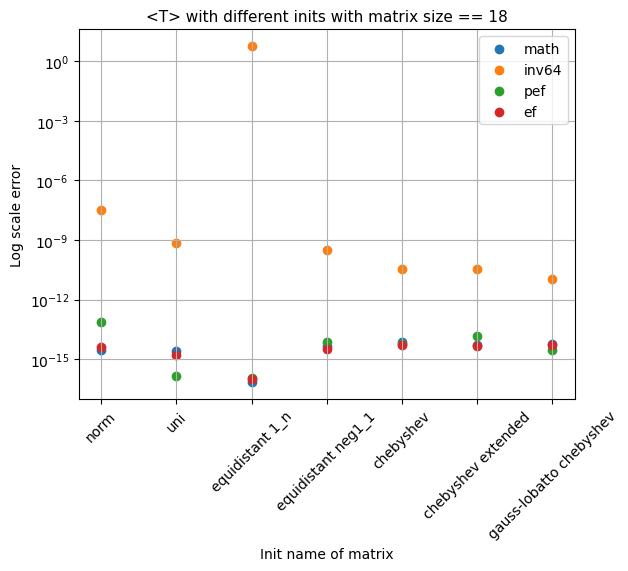

<Figure size 2000x1000 with 0 Axes>

In [28]:
n = 18
sizes = np.arange(n, n + 1)

inits = [
        ('norm', (-1, 1)), 
        ('uni', (-1, 1)),
        ('equidistant 1_n', (0, 1)), 
        ('equidistant neg1_1', (0, 1)), 
        ('chebyshev', (0, 1)), 
        ('chebyshev extended', (0, 1)), 
        ('gauss-lobatto chebyshev', (0, 1))
]

e1, e2, e3, e4, sc = [], [], [], [], []

for i, (dist, rng) in tqdm(enumerate(inits)):
    xes = get_xes(sizes, rng, dist)
    matrixes = []
    for x in tqdm(xes): 
        matrixes.append(get_matrixes(x))    

    info = get_info(xes, matrixes, mode='t')
    
    sc.append(str(dist))
    e1.append(info['e1'][0])
    e2.append(info['e2'][0])
    e3.append(info['e3'][0])
    e4.append(info['e4'][0])

plt.title(f"<T> with different inits with matrix size == {n}", fontsize=11)
plt.scatter(sc, e1, linewidth=1, label="math")
plt.scatter(sc, e2, linewidth=1, label="inv64")
plt.scatter(sc, e3, linewidth=1, label="pef")
plt.scatter(sc, e4, linewidth=1, label="ef")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.xlabel("Init name of matrix")
plt.ylabel('Log scale error')
plt.yscale("log")
plt.figure(figsize=(20, 10))
plt.show()

100%|██████████| 19/19 [12:06<00:00, 38.24s/it] 


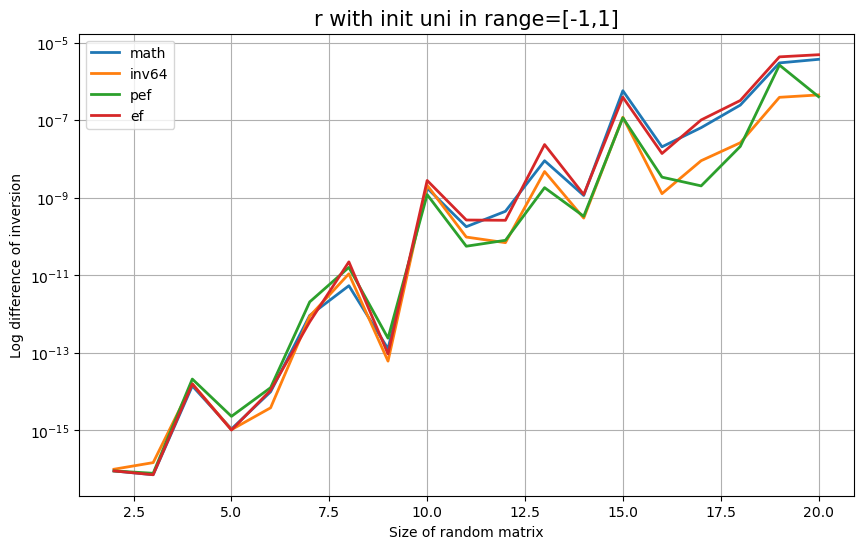

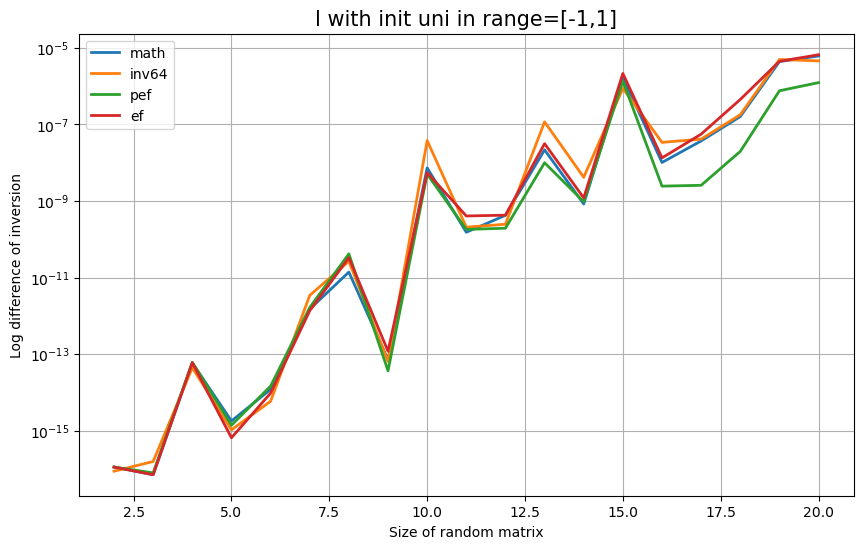

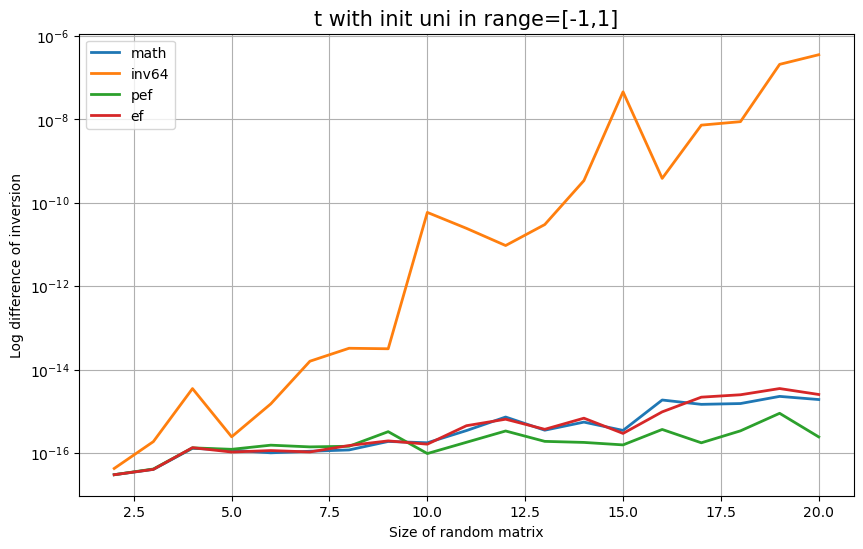

100%|██████████| 19/19 [13:01<00:00, 41.12s/it] 


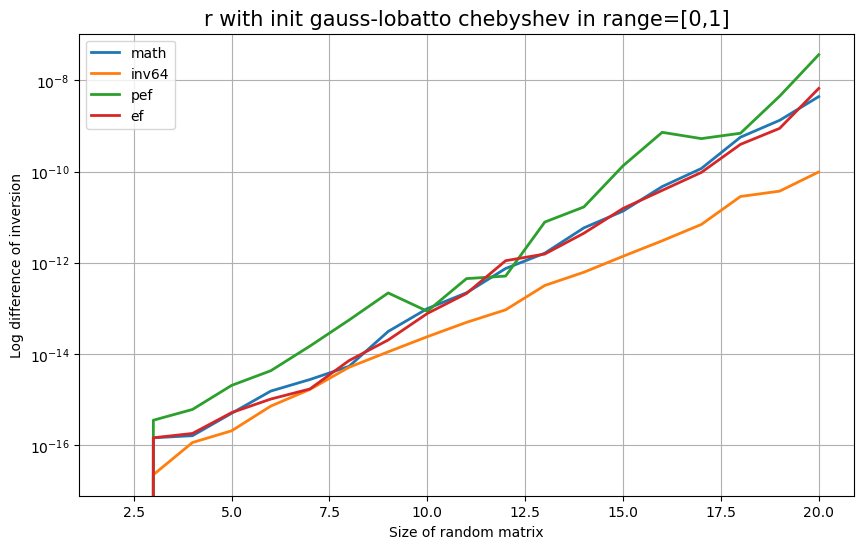

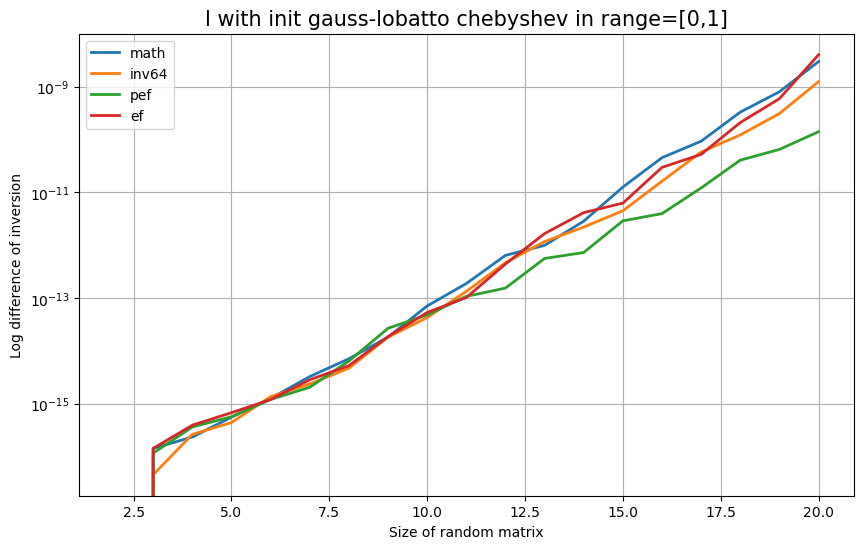

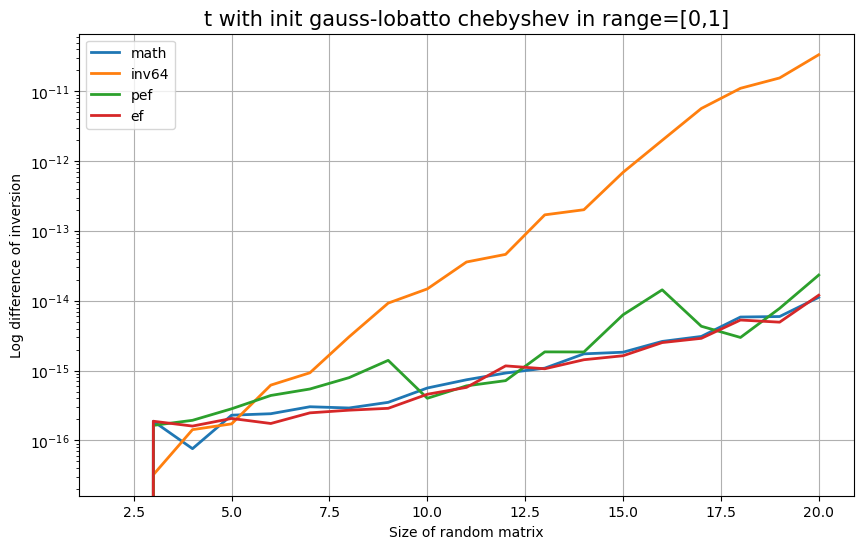

2it [25:10, 755.50s/it]


In [16]:
n = 20
sizes = np.arange(2, n + 1)

inits = [
        # ('norm', (-1, 1)), 
        ('uni', (-1, 1)),
        # ('equidistant 1_n', (0, 1)), 
        # ('equidistant neg1_1', (0, 1)), 
        # ('chebyshev', (0, 1)), 
        # ('chebyshev extended', (0, 1)), 
        ('gauss-lobatto chebyshev', (0, 1))
]

for i, (dist, rng) in tqdm(enumerate(inits)):
    xes = get_xes(sizes, rng, dist)
    matrixes = []
    for x in tqdm(xes): 
        matrixes.append(get_matrixes(x))    
    infr = get_info(xes, matrixes, mode='r')
    infl = get_info(xes, matrixes, mode='l')
    inft = get_info(xes, matrixes, mode='t')

    # plot_sizes_triplet(infr, infl, inft, rng, dist, True)

    plot_sizes(infr, rng, mode='r', init_mode=dist, log=True)
    plot_sizes(infl, rng, mode='l', init_mode=dist, log=True)
    plot_sizes(inft, rng, mode='t', init_mode=dist, log=True)

In [ ]:
matrixes = []
for x in tqdm(xes):
    matrixes.append(get_matrixes(x))

100%|██████████| 11/11 [00:01<00:00, 10.20it/s]


In [ ]:
inits = [
        # ('norm', (-1, 1)), 
        ('uni', (-1, 1)),
        # ('equidistant 1_n', (0, 1)), 
        # ('equidistant neg1_1', (0, 1)), 
        # ('chebyshev', (0, 1)), 
        # ('chebyshev extended', (0, 1)), 
        ('gauss-lobatto chebyshev', (0, 1))
]

In [ ]:
infr = get_info(xes, matrixes, mode='r')
infl = get_info(xes, matrixes, mode='l')
inft = get_info(xes, matrixes, mode='t')

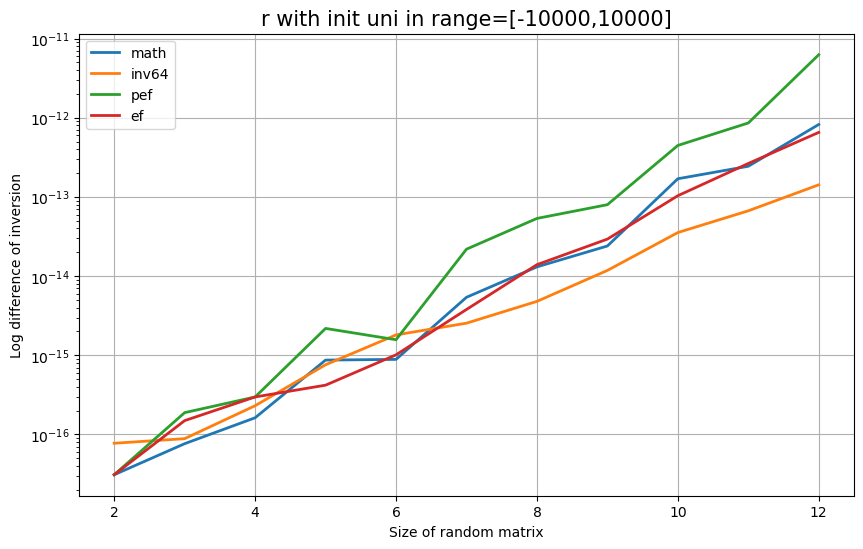

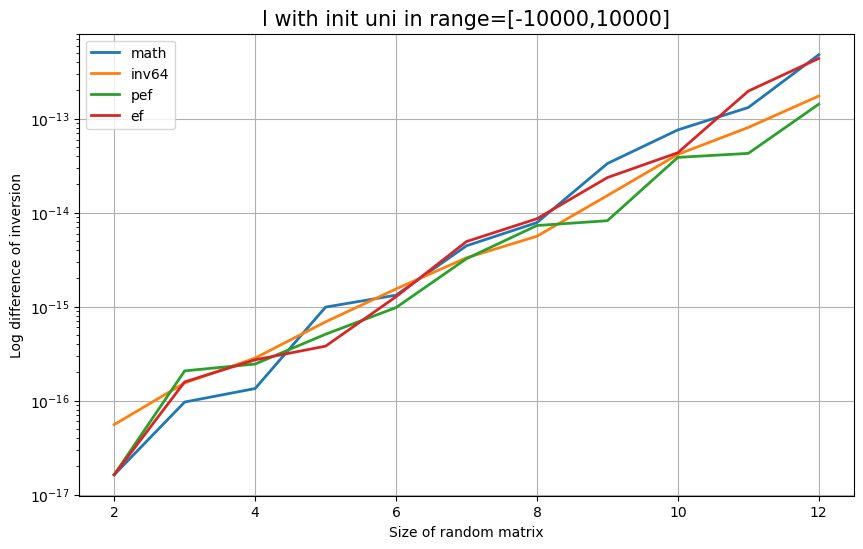

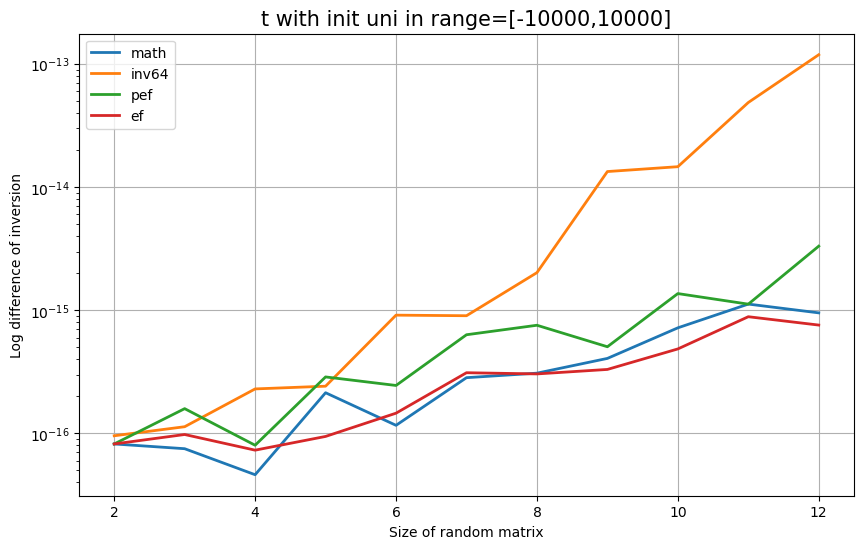

In [ ]:
# v @ v_inv
plot_sizes(infr, rng, mode='r', log=True)
# # v_inv @ v
plot_sizes(infl, rng, mode='l', log=True)
# v_inv - v_true
plot_sizes(inft, rng, mode='t',log=True)

In [ ]:
for n in range(2, 30):
    x = np.random.randn(n)

In [33]:
times = 30

ers_uni = []
ers_norm = []

mat_size = 15

for n in tqdm(range(2, times)):
    xes_uni = get_xes(np.arange(mat_size, mat_size + 1), (-1, 1), 'uni')[0]
    xes_norm = get_xes(np.arange(mat_size, mat_size + 1), (-1, 1), 'norm')[0]

    mat_uni = get_matrixes(xes_uni)
    mat_norm = get_matrixes(xes_norm)

    e_uni = get_norms(mat_uni, 't')
    e_norm = get_norms(mat_norm, 't')

    ers_uni.append(e_uni)
    ers_norm.append(e_norm)

    # e_math, e_inv64, e_pef, e_ef

100%|██████████| 28/28 [06:44<00:00, 14.44s/it]


In [53]:
import pandas as pd

# print(ers_norm)
# print(ers_uni)

arr_uni = np.array(ers_uni)
arr_norm = np.array(ers_norm)

df = pd.DataFrame(
    {'dist_name' : ['uni', 'norm'],
    "math" : [(arr_uni.max(axis=0)[0], arr_uni.mean(axis=0)[0]), (arr_norm.max(axis=0)[0], arr_norm.mean(axis=0)[0])],
    "inv64" : [(arr_uni.max(axis=0)[1], arr_uni.mean(axis=0)[1]), (arr_norm.max(axis=0)[1], arr_norm.mean(axis=0)[1])],
    "pef" : [(arr_uni.max(axis=0)[2], arr_uni.mean(axis=0)[2]), (arr_norm.max(axis=0)[2], arr_norm.mean(axis=0)[2])],
    "ef" : [(arr_uni.max(axis=0)[3], arr_uni.mean(axis=0)[3]), (arr_norm.max(axis=0)[3], arr_norm.mean(axis=0)[3])]
     })

df.to_csv('table.csv')